In [5]:
import os
import sys 
sys.path.remove('/Users/karolinagrzeszkiewicz/robustness-tests/locomotion/tests/robustness_tests')
sys.path.append('/Users/karolinagrzeszkiewicz/locomotion')
import locomotion 
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm

In [6]:
FR_test_high = pd.read_csv("/Users/karolinagrzeszkiewicz/robustness-tests/locomotion/tests/robustness_tests/results/FR_test_higher/Results_BDD.csv")
FR_test_low = pd.read_csv("/Users/karolinagrzeszkiewicz/robustness-tests/locomotion/tests/robustness_tests/results/FR_test_lower/Results_BDD.csv")
density_test_high = pd.read_csv("/Users/karolinagrzeszkiewicz/robustness-tests/locomotion/tests/robustness_tests/results/density_test_higher/Results_BDD.csv") 
density_test_low = pd.read_csv("/Users/karolinagrzeszkiewicz/robustness-tests/locomotion/tests/robustness_tests/results/density_test_lower/Results_BDD.csv")

In [7]:
#some data cleaning
FR_high_sequence = []
for i in range(24, 120, 2):
    FR_high_sequence.append(i)
    
FR_test_high.columns = FR_high_sequence
FR_test_high['curve_no'] = list(range(0,50))
FR_test_high = FR_test_high.melt(id_vars=["curve_no"],var_name= "FR", value_name= "Value")
FR_test_high.sort_values(by=['curve_no','FR'],inplace=True)

FR_low_sequence = []
for i in range(6, 24, 1):
    FR_low_sequence.append(i)
    
FR_test_low.columns = FR_low_sequence
FR_test_low['curve_no'] = list(range(0,50))
FR_test_low = FR_test_low.melt(id_vars=["curve_no"],var_name= "FR", value_name= "Value")
FR_test_low.sort_values(by=['curve_no','FR'],inplace=True)


In [8]:
density_high_sequence = [2.368992797258969, 3.2898658440840056, 5.473812199530617, 4.574146602662274, 
                         2.6141573284228126, 5.96774414486297, 4.919487032372022, 5.477229681809226, 
                         6.742887510799092, 2.345219811091552, 5.731522408977321, 3.993338537545986, 
                         7.889034959596039, 7.007766085735554, 4.217502998657783, 7.605826873681228,
                         2.0942184770464873, 2.542377644820858, 6.462880785207142, 2.549370957944128, 
                         7.137798629767561, 4.795589643398923, 6.045053445122158, 4.906692977326488, 
                         7.598186263992971, 4.833726585289512, 3.1708362804940107, 7.161979381629832,
                         5.306152816775535, 2.0872776459143214, 3.635836263604438, 6.165319987583199, 
                         2.0038089224212623, 7.533163519018309, 4.606802991494709, 5.123603390379272, 
                         7.976843833741872, 4.88059504692373, 6.726006046753367, 6.478311752285514,
                         7.5641876376455235, 3.709645474493994, 3.971763829555001, 2.8308933469802953, 
                         2.092628573464515, 2.344690794845139, 7.672325316009733, 3.905226532844937, 
                         3.444615738840314, 7.912618974332681]

#density values copied from the Results_variables.json file 
    
density_test_high.columns = density_high_sequence
density_test_high['curve_no'] = list(range(0,50))
density_test_high = density_test_high.melt(id_vars=["curve_no"],var_name= "density", value_name= "Value")
density_test_high.sort_values(by=['curve_no','density'],inplace=True)

density_low_sequence = [1.0906912451058035, 1.268479888157353, 1.1679789287915743, 1.6633547378982025, 
                        1.7321744370406937, 1.122045331110551, 1.2272947823777238, 0.8255097659351933, 
                        1.2916626185228084, 1.9371499257510707, 1.3530284234527397, 1.2013791915770669,
                        1.0328891792633028, 1.719768238512047, 0.7260818498032382, 1.2956324976020566, 
                        0.8138626893973424, 1.083666675641727, 0.5872537420307997, 1.6176015180698782, 
                        1.5944544810207444, 1.4769154852446387, 1.7144448832683261, 1.1889047509079453, 
                        1.4975589647608254, 1.7472224459326873, 0.8885039498009015, 0.5540597093138122, 
                        1.7885775630922738, 1.7963759381823556, 1.112417410993694, 1.1035645550893247, 
                        1.6817017739193096, 1.960848387207407, 1.4710519729614413, 0.7679457658315942, 
                        1.422682375926864, 1.9331329008370457, 1.1262315521264585, 1.303818727304506, 
                        1.9349910658067457, 0.9212269099361686, 1.631284465923661, 1.2742029423793777, 
                        1.1645463456276386, 1.1776386616022918, 0.9996399216968882, 1.2382198048648845, 
                        1.1723253337564363, 1.9242555125998462]
    
density_test_low.columns = density_low_sequence
density_test_low['curve_no'] = list(range(0,50))
density_test_low = density_test_low.melt(id_vars=["curve_no"],var_name= "density", value_name= "Value")
density_test_low.sort_values(by=['curve_no','density'],inplace=True)

In [13]:
density_test = pd.concat([density_test_low, density_test_high])
FR_test = pd.concat([FR_test_low, FR_test_high])

In [14]:
#assume we're given a data frame with 3 columns: 'curve_no', 'FR'/'RES', 'Value' (BDD) 
#important: if the data frame = 2 data frames merged then rememember not to double-count values for curves with meanVAR
#even if double counting it shouln't affect the outcome (only the number of curves will be greater)

def plotBDDforVar (data_Vartest, Var, meanVar):
    n_values = data_Vartest[Var].nunique()
    n_curves = int((len(data_Vartest.Value))/n_values) 
    colors = cm.rainbow(np.linspace(0, 1, 50))
    
    if Var == "FR":
        for i, c in zip(range(n_curves), colors):
            data = data_Vartest[data_Vartest.curve_no == i]
            data_curve = data[data.FR != meanVar]
            plt.scatter('FR','Value',data= data_curve[data_curve.curve_no == i], color = c)
        plt.title("BDD Value vs. Frame Rate (frames/sec) for " + str(n_curves) + " Randomly Generated Curves")
    elif Var == "density":
        for i, c in zip(range(n_curves), colors):
            data = data_Vartest[data_Vartest.curve_no == i]
            data_curve = data[data.density != meanVar]
            plt.scatter('density','Value',data= data_curve[data_curve.curve_no == i], color = c)
        plt.title("BDD Value vs. pixel density (px/mm) for " + str(n_curves) + " Randomly Generated Curves")
    else:
        print("The variable must be either FR (Frame Rate) or RES (Resolution)")
        
        
#add label, x and y, better title
#add more error messages if applied to wrong arguments
#investigate outliers
#plot curves separately/separate curves

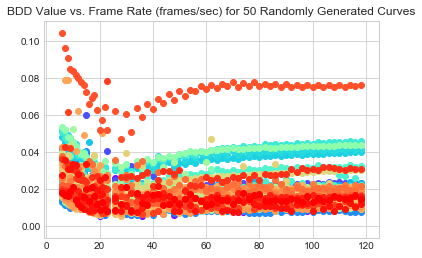

In [15]:
plotBDDforVar(FR_test, "FR", 24)

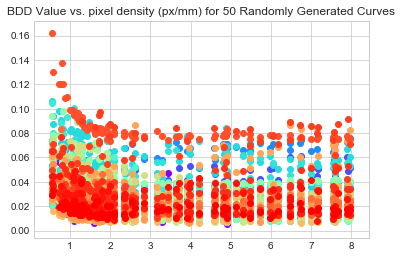

In [16]:
plotBDDforVar(density_test, "density", 2)

In [29]:
#plot curves separately 

def plotBDDforVarSep (var, meanVar, curves = range(50)):
    colors = cm.rainbow(np.linspace(0, 1, 50))
    if var == "FR":
        for i, c in zip(curves, colors):
            data = FR_test[FR_test.curve_no == i]
            data = data[data.FR != meanVar]
            label = 'curve ' + str(i)
            xlab = 'FR' + ' for '+ label
            ylab = 'BDD value' + ' for '+ label
            ax = sns.jointplot(x = 'FR', y = 'Value', data = data)
            ax.set_axis_labels(xlab, ylab, fontsize=14)
    elif var == "density":
        for i in curves:
            data = density_test[density_test.curve_no == i]
            data = data[data.density != meanVar]
            label = 'density_test_curve ' + str(i)
            xlab = 'density' + ' for '+ label
            ylab = 'BDD value' + ' for '+ label
            ax = sns.jointplot(x='density',y='Value', data= data)
            ax.set_axis_labels(xlab, ylab, fontsize=14)
    else:
        print("There is no such variable as " + var)
        
    


In [35]:
#Find outliers for FR
FR_test[FR_test.Value > 0.06]
FR_outlier_curves = FR_test.curve_no[FR_test.Value > 0.06]
FR_outlier_curves.unique()

array([ 5, 38, 44, 45])

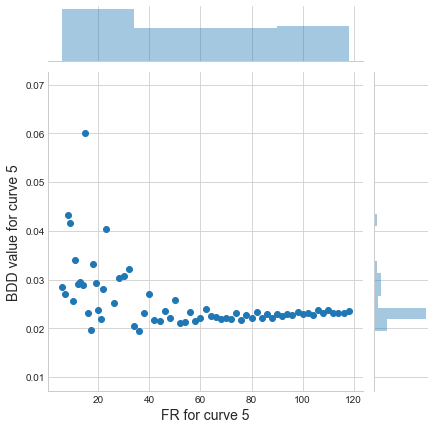

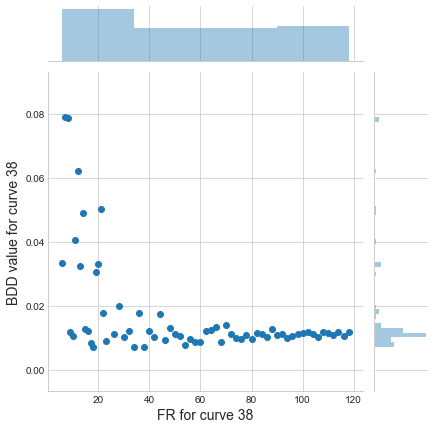

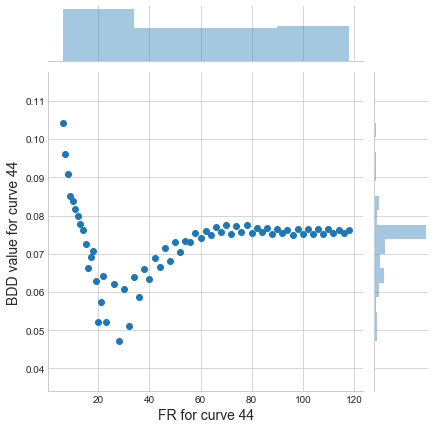

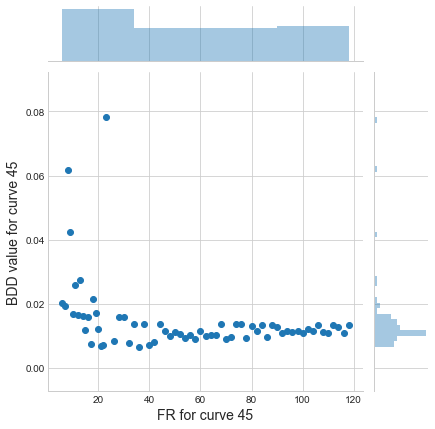

In [36]:
plotBDDforVarSep("FR", 24, [ 5, 38, 44, 45])
#curve_no 44 is an outlier curve with BDD mostly in [0.07,0.11]

In [55]:
density_high_sequence = [2.368992797258969, 3.2898658440840056, 5.473812199530617, 4.574146602662274, 
                         2.6141573284228126, 5.96774414486297, 4.919487032372022, 5.477229681809226, 
                         6.742887510799092, 2.345219811091552, 5.731522408977321, 3.993338537545986, 
                         7.889034959596039, 7.007766085735554, 4.217502998657783, 7.605826873681228,
                         2.0942184770464873, 2.542377644820858, 6.462880785207142, 2.549370957944128, 
                         7.137798629767561, 4.795589643398923, 6.045053445122158, 4.906692977326488, 
                         7.598186263992971, 4.833726585289512, 3.1708362804940107, 7.161979381629832,
                         5.306152816775535, 2.0872776459143214, 3.635836263604438, 6.165319987583199, 
                         2.0038089224212623, 7.533163519018309, 4.606802991494709, 5.123603390379272, 
                         7.976843833741872, 4.88059504692373, 6.726006046753367, 6.478311752285514,
                         7.5641876376455235, 3.709645474493994, 3.971763829555001, 2.8308933469802953, 
                         2.092628573464515, 2.344690794845139, 7.672325316009733, 3.905226532844937, 
                         3.444615738840314, 7.912618974332681]

density_low_sequence = [1.0906912451058035, 1.268479888157353, 1.1679789287915743, 1.6633547378982025, 
                        1.7321744370406937, 1.122045331110551, 1.2272947823777238, 0.8255097659351933, 
                        1.2916626185228084, 1.9371499257510707, 1.3530284234527397, 1.2013791915770669,
                        1.0328891792633028, 1.719768238512047, 0.7260818498032382, 1.2956324976020566, 
                        0.8138626893973424, 1.083666675641727, 0.5872537420307997, 1.6176015180698782, 
                        1.5944544810207444, 1.4769154852446387, 1.7144448832683261, 1.1889047509079453, 
                        1.4975589647608254, 1.7472224459326873, 0.8885039498009015, 0.5540597093138122, 
                        1.7885775630922738, 1.7963759381823556, 1.112417410993694, 1.1035645550893247, 
                        1.6817017739193096, 1.960848387207407, 1.4710519729614413, 0.7679457658315942, 
                        1.422682375926864, 1.9331329008370457, 1.1262315521264585, 1.303818727304506, 
                        1.9349910658067457, 0.9212269099361686, 1.631284465923661, 1.2742029423793777, 
                        1.1645463456276386, 1.1776386616022918, 0.9996399216968882, 1.2382198048648845, 
                        1.1723253337564363, 1.9242555125998462]

FR_high_sequence = list(range(26, 120, 2))

FR_low_sequence = list(range(6, 24, 1))

In [89]:
user_path = '/Users/karolinagrzeszkiewicz/robustness-tests/locomotion/tests/robustness_tests/results/'
trial_dict = {
    "FR_test_higher": FR_high_sequence,
    "FR_test_lower": FR_low_sequence,
    "density_test_higher": density_high_sequence,
    "density_test_lower": density_low_sequence
}

def curvePlot(folder, var, curve_no, trial):
    #curve_no and trial must be double-digit strings (also trial can be = "CTRL")
    name_of_dat = 'CRV_'+curve_no+'_TEST_' + trial +'.dat'
    path_to_dat = user_path +folder+'/'+name_of_dat
    data = pd.read_csv(path_to_dat)
    x = data.X
    y = data.Y
    plt.plot(x, y)
    if trial == "CTRL":
        plt.title("Coordinate plot for Curve No. " + curve_no + ', Trial No.' + trial)
    else:
        trial_int = int(trial)
        tests = trial_dict[folder]
        trial_value = tests[trial_int]
        plt.title("Coordinate plot for Curve No. " + curve_no + ', Trial No.' + trial + ', ' + var +':'+str(trial_value))
    x_max = max(x)
    y_max = max(y)
    l = []
    l.append(x_max)
    l.append(y_max)
    m = max(l)
    plt.axis([0, m + 20, 0, m +20])
    plt.show()
    


In [90]:
def curvePlot_for_all_trials(folder, var, curve_no):
    trials = trial_dict[folder]
    n_trials = len(trials)
    curvePlot(folder, var, curve_no, "CTRL")
    for i in range(n_trials):
        trial = '%02d' % i
        curvePlot(folder, var, curve_no, trial)

In [ ]:
#curvePlot_for_all_trials('FR_test_lower', 'FR', '44')
#curvePlot_for_all_trials('FR_test_higher', 'FR', '44')

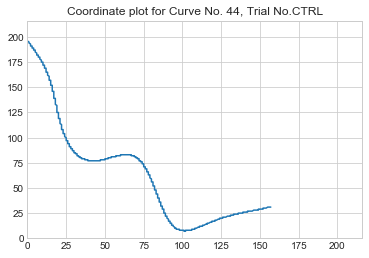

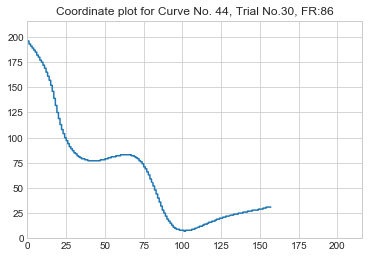

In [91]:
curvePlot('FR_test_higher', 'FR', '44', 'CTRL')
curvePlot('FR_test_higher', 'FR', '44', '30')